In [3]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# %matplotlib notebook
%matplotlib inline

plt.rcParams['figure.figsize'] = [8, 6]

In [ ]:
# Ejecutar si eres usuario de Google Colab, no ejecutar si trabajas de manera local en tu computador
!gdown "1Egv9Q7MnDqPHNO25n-bmGUs4qOcgal4b" #  

hp = pd.read_csv('house-prices.csv')
hp

In [61]:
# Para usuarios de entornos virtuales o locales, ejecutar esta celda
hp = pd.read_csv('../Datasets/house-prices.csv') # Cargar el dataset de la carpeta Datasets del repositorio de IA_Explorador en GitHub
hp

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


Text(0.5, 1.0, 'Precio vs Área (pies cuadrados)')

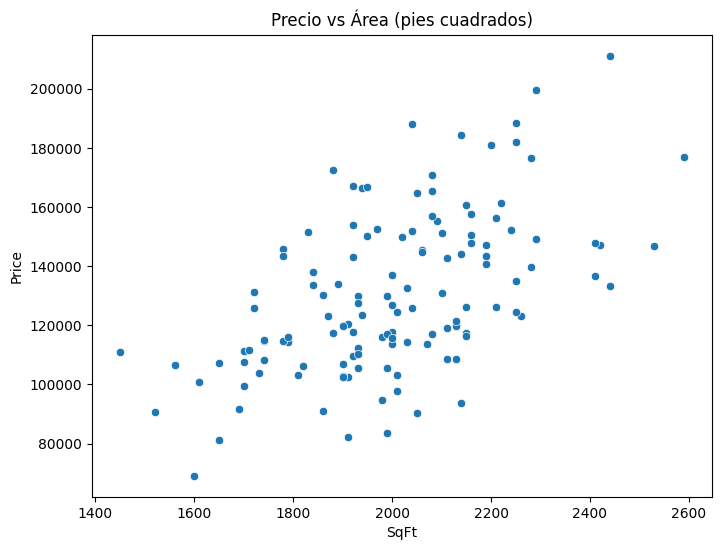

In [17]:
sns.scatterplot(x='SqFt', y='Price', data=hp).set_title('Precio vs Área (pies cuadrados)') # Gráfico de dispersión

## Primer paso: Crear divisiones de entrenamiento/prueba 
- El conjunto de entrenamiento es para ajustar el modelo (encontrar los pesos) 
- El conjunto de prueba, después de que el modelo esté entrenado, evalúa el modelo en datos nunca antes vistos


In [62]:
# Si es la primera vez que ejecutas el cuaderno sigue con la siguiente celda y luego vuelve a ejecutar esta celda
X_train # Datos de entrenamiento

112    1940
116    2290
4      2130
12     1910
99     2080
       ... 
56     2190
3      1980
121    1930
24     2210
106    2130
Name: SqFt, Length: 102, dtype: int64

In [19]:
# Características -> X
X = hp["SqFt"] # Usamos la columna SqFt como característica

# Etiquetas objetivo -> y
y = hp["Price"] # Usamos la columna Price como etiqueta

X_train, X_test, y_train, y_test = train_test_split( # Dividimos los datos en conjuntos de entrenamiento y de prueba
  X, y, # Los datos a dividir
  test_size=0.2,  # La proporción de datos que serán para prueba
  random_state=3, # Establecemos un random_state específico para que obtengamos la misma partición ("aleatoria") cada vez
  shuffle=True    # Establecemos shuffle en True para que los datos se mezclen aleatoriamente antes de la partición
)

X_train[0] # Primer dato de entrenamiento
# X_train.iloc[0], y_train.iloc[0] # Primer dato de entrenamiento

np.int64(1790)

In [14]:
X.shape # Forma de X

(128,)

In [20]:
X_train.shape, X_test.shape # 80% de los datos para entrenamiento y 20% para prueba

((102,), (26,))

In [ ]:
y_train.shape, y_test.shape # 80% de los datos para entrenamiento y 20% para prueba

((102,), (26,))

## Crear un modelo de referencia (naive)

In [21]:
class NaiveRegressor():
  """
Este modelo calculará la media de nuestro conjunto de datos 
de entrenamiento y utilizará ese valor como el valor predicho 
para cualquier entrada dada. h(x) = median(train_labels)

  h(x) = median(train_labels)
  """

  def __init__(self): # Inicialización del modelo
    self.w0 = 0 # Inicializamos el peso w0 en 0
    self.w1 = 0 # Inicializamos el peso w1 en 0

  def cost(self, X, y): # Función de costo

    # MSE: Error cuadrático medio
    diff = (self.predict(X) - y)**2 # Diferencia entre la predicción y el valor real
    m    = len(X) # Número de ejemplos
    diff_sum = sum(diff) / m # Suma de las diferencias
    return diff_sum # Retornamos el error cuadrático medio

  def fit(self, X, y): # Entrenamiento del modelo
    self.w0 = np.median(y) # Calculamos la mediana de las etiquetas de entrenamiento

  def predict(self, x): # Predicción
    return self.w0 # Retornamos la mediana de las etiquetas de entrenamiento


- **fit()** -> entrena el modelo 
- **predict()** -> usa el modelo entrenado para obtener una predicción 
- **transform()** -> usa el modelo entrenado para transformar los datos, no se usa aquí pero es común tenerlo en escaladores como MinMaxScaler()

In [22]:
# Crear el modelo regresor
nv_regressor = NaiveRegressor() # Instanciamos el modelo

# Calcular el costo sin entrenar el modelo
nv_regressor.cost(X=X_train, y=y_train)

17647522254.901962

In [23]:
# Predecir devuelve 0 porque aún no hemos entrenado el modelo.
# Los pesos no están ajustados
nv_regressor.predict(1000)

0

In [25]:
# Creamos y entrenamos el modelo
nv_regressor = NaiveRegressor() # Instanciamos el modelo
nv_regressor.fit(X=X_train, y=y_train) # <- establece w0 como la mediana
nv_regressor.cost(X=X_train, y=y_train) # Calculamos el costo


737499950.9803921

In [27]:
nv_regressor.predict(250) # Predicción para un dato de prueba

np.float64(125950.0)

In [28]:
nv_regressor.predict(70) # Predicción para un dato de prueba

np.float64(125950.0)

In [29]:
nv_regressor.predict(-100) #

np.float64(125950.0)

<Axes: title={'center': 'Precio vs Área (Piés cuadrados)'}, xlabel='SqFt', ylabel='Price'>

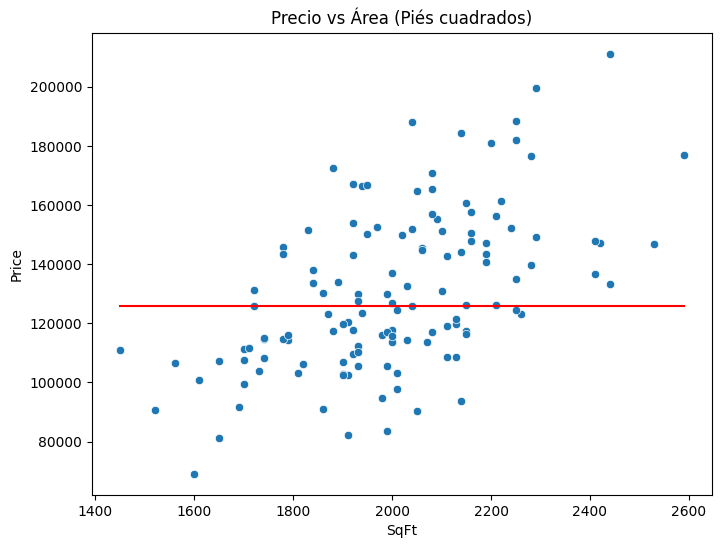

In [31]:
sns.scatterplot(x='SqFt', y='Price', data=hp).set_title('Precio vs Área (Piés cuadrados)') # Gráfico de dispersión

x1 = hp["SqFt"].min() # Valor mínimo de SqFt
x2 = hp["SqFt"].max() # Valor máximo de SqFt
y1 = nv_regressor.predict(x1) # Predicción para x1
y2 = nv_regressor.predict(x2) # Predicción para x2
sns.lineplot(x=[x1, x2,], y=[y1, y2,], color='r') # Línea de regresión

In [33]:
class RandLinearRegressor():
  """
  Modelo de regresión lineal en el que las ponderaciones 
  se eligen por muestreo aleatorio.
  """

  def __init__(self, max_iter): # Inicialización del modelo
    self.w0 = 0 # Inicializamos el peso w0 en 0
    self.w1 = 0 # Inicializamos el peso w1 en 0
    self._max_iter = max_iter # Número máximo de iteraciones

  def cost(self, X, y): # Función de costo
    # MSE: error cuadrático medio
    diff = (self.predict(X) - y)**2 # Diferencia entre la predicción y el valor real
    m    = len(X) # Número de ejemplos
    diff_sum = sum(diff) / m # Suma de las diferencias
    return diff_sum # Retornamos el error cuadrático medio

  def fit(self, X, y): # Entrenamiento del modelo
    for i in range(self._max_iter): # Iteramos sobre el número máximo de iteraciones
      initial_cost = self.cost(X, y) # Calculamos el costo inicial
      tmp_w0, tmp_w1 = self.w0, self.w1 # Guardamos los pesos temporales

      self.w0, self.w1 = np.random.randint(-10000, 10000, 2) # Pesos aleatorios
      cost_value = self.cost(X, y) # Calculamos el costo
      if cost_value > initial_cost: # Si el costo es mayor al inicial
        self.w0, self.w1 = tmp_w0, tmp_w1 # Restauramos los pesos temporales

  def predict(self, x): # Predicción
    y = self.w1 * x + self.w0 # Calculamos la predicción
    return y # Retornamos la predicción


In [34]:
%%time

# Crear y entrenar el modelo
nv_regressor = RandLinearRegressor(max_iter=10000) # Instanciamos el modelo

nv_regressor.fit(X=X_train, y=y_train) # Entrenamos el modelo

CPU times: total: 4.47 s
Wall time: 9.5 s


In [ ]:
nv_regressor.w0, nv_regressor.w1 # Pesos del modelo

In [ ]:
nv_regressor.predict(20000) # Predicción para un dato de prueba

<Axes: title={'center': 'Precio vs Área (Piés cuadrados)'}, xlabel='SqFt', ylabel='Price'>

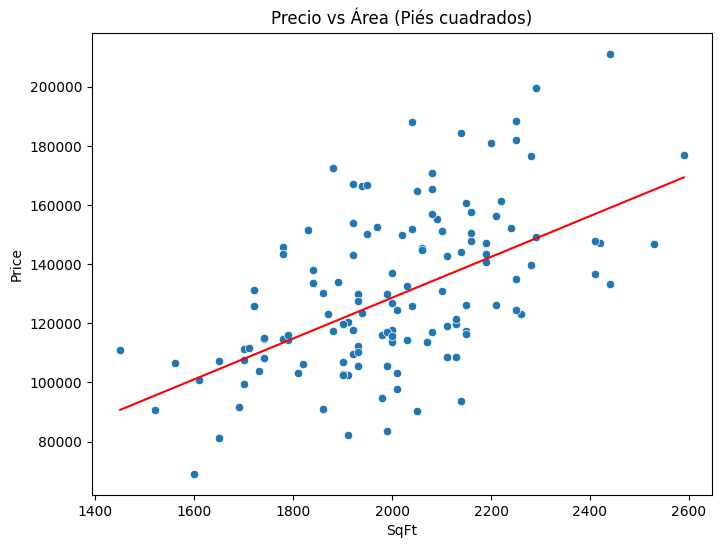

In [38]:
sns.scatterplot(x='SqFt', y='Price', data=hp).set_title('Precio vs Área (Piés cuadrados)') # Gráfico de dispersión

x1 = hp["SqFt"].min() # Valor mínimo de SqFt
x2 = hp["SqFt"].max() # Valor máximo de SqFt
y1 = nv_regressor.predict(x1) # Predicción para x1
y2 = nv_regressor.predict(x2) # Predicción para x2
sns.lineplot(x=[x1, x2,], y=[y1, y2,], color='r') # Línea de regresión

In [ ]:
train_cost = nv_regressor.cost(X=X_train, y=y_train) # Costo de entrenamiento
train_cost # Costo de entrenamiento


In [ ]:
test_cost = nv_regressor.cost(X=X_test, y=y_test) # Costo de prueba
test_cost # Costo de prueba

In [ ]:
train_cost - test_cost # Diferencia entre el costo de entrenamiento y el de prueba

## Entrenar el modelo de regresión lineal en los datos

In [ ]:
lr1 = SGDRegressor() # Instanciamos el modelo


In [ ]:
# Esto fallará porque no hemos entrenado el modelo todavía 
# Los pesos no están fijados en este punto
# lr1.coef_, lr1.lr1.intercept_

In [42]:
# Entrenar el modelo y comprobar de nuevo los pesos
lr1 = SGDRegressor(eta0=0.1, max_iter=1000, verbose=1, random_state=0) # Instanciamos el modelo
 
lr1.fit(X_train.values.reshape(-1, 1), y_train) # Entrenamos el modelo


-- Epoch 1
Norm: 18113445905546.32, NNZs: 1, Bias: -84477558042.133514, T: 102, Avg. loss: 5502348520866709853505867109892096.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 20818718118649.64, NNZs: 1, Bias: -84706408157.001389, T: 204, Avg. loss: 2200703657039175973050036785250304.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 17370104556053.86, NNZs: 1, Bias: -134001534477.896454, T: 306, Avg. loss: 1844230067369647768481110008266752.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 24290250149958.84, NNZs: 1, Bias: -87862471978.158997, T: 408, Avg. loss: 1307081399583364210778955629723648.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4889545645419.24, NNZs: 1, Bias: -131119710000.896729, T: 510, Avg. loss: 1207125060199216723780707289137152.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 18685306256206.22, NNZs: 1, Bias: -130804439218.043579, T: 612, Avg. loss: 1207390291324531189450882169176064.000000
Total training time: 0.00

SGDRegressor(eta0=0.1, random_state=0, verbose=1)

In [ ]:
lr1.coef_ # Peso w1

array([-1.60158125e+13])

In [ ]:
lr1.intercept_ # Peso w0

array([8.16184838e+09])

### Graficar los los datos y el modelo entrenado

Ecuación: y = 130098.92 + 15555.12x1


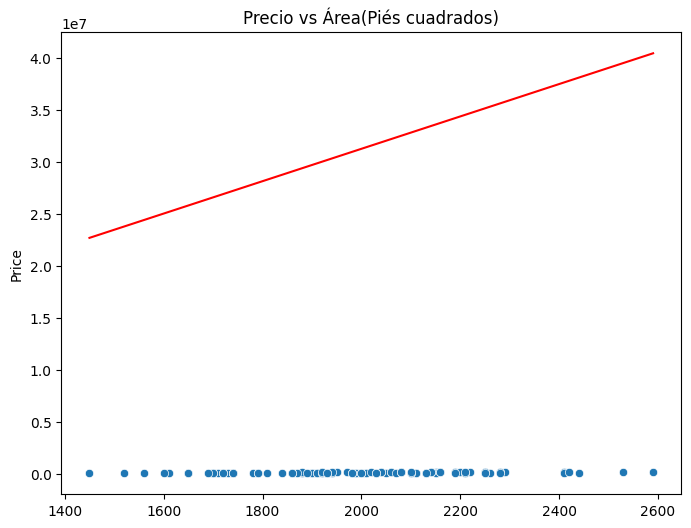

In [47]:
print(f"Ecuación: y = {lr1.intercept_[0]:.2f} + {lr1.coef_[0]:.2f}x1") # Ecuación de la recta

x1 = X_train.min() # Valor mínimo de SqFt
y1 = (lr1.coef_ * x1 + lr1.intercept_)[0] # Predicción para x1
x2 = X_train.max() # Valor máximo de SqFt
y2 = (lr1.coef_ * x2 + lr1.intercept_)[0] # Predicción para x2

sns.scatterplot(x=X_train.values, y=y_train).set_title('Precio vs Área(Piés cuadrados)') # Gráfico de dispersión
sns.lineplot(x=[x1, x2,], y=[y1, y2,], color='r') # Línea de regresión
plt.show() # Mostrar gráfico

In [44]:
lr1.predict([[2400]]) # Predicción para un dato de prueba

array([-2.32886449e+16])

## Usemos algo de Ingeniería de Características

En primer lugar, escalaremos los datos para facilitar la convergencia del algoritmo SGD.

In [45]:
std_scaler = StandardScaler() # Instanciamos el escalador
# Ajuste el escalador SÓLO a los datos del entrenamiento.
std_scaler.fit(X_train.values.reshape(-1, 1)) # Ajustamos el escalador
X_train_scaled = std_scaler.transform(X_train.values.reshape(-1, 1)) # Escalamos los datos de entrenamiento

# Ahora vamos a crear nuestro modelo y utilizar las características escaladas para el entrenamiento
lr1 = SGDRegressor(verbose=1, random_state=0) # Instanciamos el modelo
lr1.fit(X_train_scaled, y_train) # Entrenamos el modelo


-- Epoch 1
Norm: 7012.82, NNZs: 1, Bias: 44971.685169, T: 102, Avg. loss: 5727733004.044065
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9289.76, NNZs: 1, Bias: 66593.372067, T: 204, Avg. loss: 3002704039.292192
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 10704.20, NNZs: 1, Bias: 80928.410895, T: 306, Avg. loss: 1835199918.460647
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 11745.65, NNZs: 1, Bias: 91231.196525, T: 408, Avg. loss: 1215857345.422857
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 12501.08, NNZs: 1, Bias: 98901.842990, T: 510, Avg. loss: 858233542.784618
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 13098.91, NNZs: 1, Bias: 104779.264786, T: 612, Avg. loss: 642429098.762385
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 13557.99, NNZs: 1, Bias: 109366.900975, T: 714, Avg. loss: 507164497.949092
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 13896.58, NNZs: 1, Bias: 113030.665215, T: 816, Avg. loss: 419862102.596673
Total training

SGDRegressor(random_state=0, verbose=1)

Ecuación: y = 130098.92 + 15555.12x1


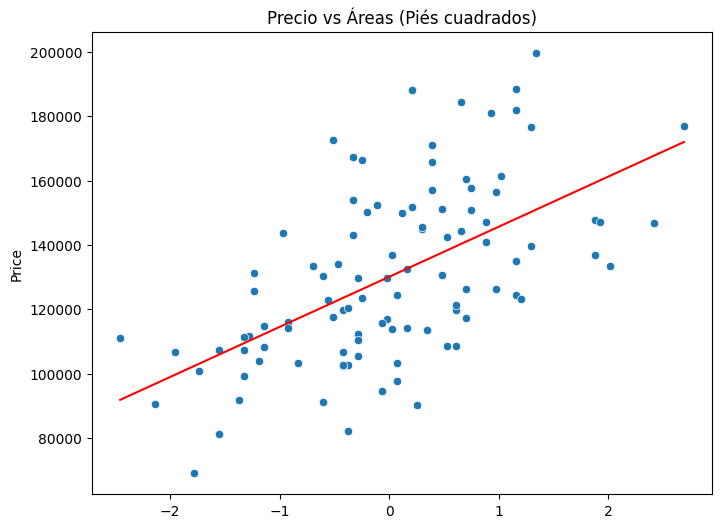

In [46]:
print(f"Ecuación: y = {lr1.intercept_[0]:.2f} + {lr1.coef_[0]:.2f}x1") # Ecuación de la recta

x1 = X_train_scaled.min() # Valor mínimo de SqFt
y1 = (lr1.coef_ * x1 + lr1.intercept_)[0] # Predicción para x1
x2 = X_train_scaled.max() # Valor máximo de SqFt
y2 = (lr1.coef_ * x2 + lr1.intercept_)[0] # Predicción para x2

sns.scatterplot(x=X_train_scaled.flatten(), y=y_train).set_title('Precio vs Áreas (Piés cuadrados)') # Gráfico de dispersión
sns.lineplot(x=[x1, x2,], y=[y1, y2,], color='r') # Línea de regresión
plt.show() # Mostrar gráfico

In [ ]:
# Realizar predicciones sobre el conjunto de datos de entrenamiento
y_train_pred = lr1.predict(X_train_scaled)


In [ ]:
# Realizar predicciones sobre el conjunto de datos de prueba
X_test_scaled = std_scaler.transform(X_test.values.reshape(-1, 1))
y_test_pred = lr1.predict(X_test_scaled)


## Regresión lineal con dos características

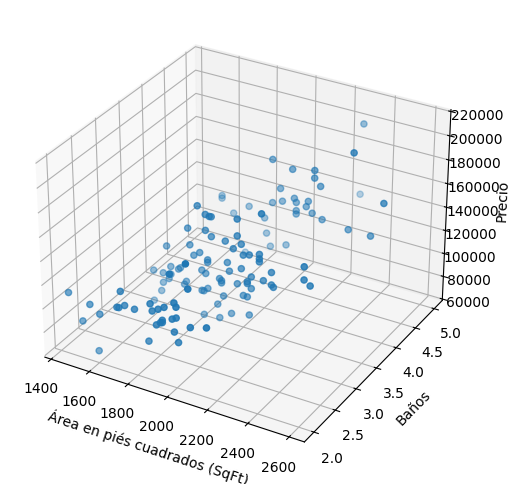

In [52]:
fig = plt.figure() # Creamos una figura
ax = fig.add_subplot(111, projection = '3d') # Añadimos un subplot 3D
 
x = hp["SqFt"] # Característica x
y = hp["Bedrooms"] # Característica y
z = hp["Price"] #

ax.set_xlabel("Área en piés cuadrados (SqFt)") # Etiqueta del eje x
ax.set_ylabel("Baños") # Etiqueta del eje y
ax.set_zlabel("Precio") # Etiqueta del eje z

ax.scatter(x, y, z) # Gráfico de dispersión 3D

plt.show()  # Mostrar gráfico

In [50]:
# Entrenando con dos características
lr2 = SGDRegressor(random_state=0) # Instanciamos el modelo

X = hp[["SqFt", "Bedrooms"]].values # Usamos las columnas SqFt y Bedrooms como características
y = hp.Price.values # Usamos la columna Price como etiqueta
 
std_scaler = StandardScaler() # Instanciamos el escalador
X_scaled = std_scaler.fit_transform(X) # Escalamos las características

lr2.fit(X_scaled, y) # Entrenamos el modelo


SGDRegressor(random_state=0)

Ecuación: y = 130435.57 + 10414.80x1 + 9039.34x2


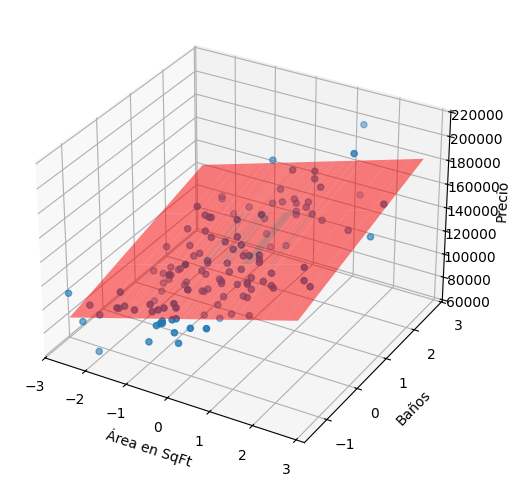

In [55]:
# Gráfico
coefs = lr2.coef_ # Pesos
intercept = lr2.intercept_  # Intercepto
num_samples = len(X) # Número de muestras

x = X_scaled[:, 0] # Característica x
y = X_scaled[:, 1] # Característica y
z = hp.Price.values # Etiqueta
xs = np.tile(np.sort(x), (num_samples, 1)) # Repetimos x
ys = np.tile(np.sort(y), (num_samples, 1)).T # Repetimos y
zs = xs*coefs[0] + ys*coefs[1] + intercept # Calculamos z
print(f"Ecuación: y = {intercept[0]:.2f} + {coefs[0]:.2f}x1 + {coefs[1]:.2f}x2") # Ecuación de la recta

fig = plt.figure() # Creamos una figura
ax = fig.add_subplot(111, projection = '3d') # Añadimos un subplot 3D

ax.set_xlabel("Área en SqFt") # Etiqueta del eje x
ax.set_ylabel("Baños") 
ax.set_zlabel("Precio")

ax.scatter(x, y, z) # Gráfico de dispersión 3D
ax.plot_surface(xs,ys,zs, alpha=0.5, color='r') # Superficie de regresión

plt.show() # Mostrar gráfico

In [56]:
y_pred = lr2.predict(X_scaled) # Predicciones


## Regresión con características polinómicas

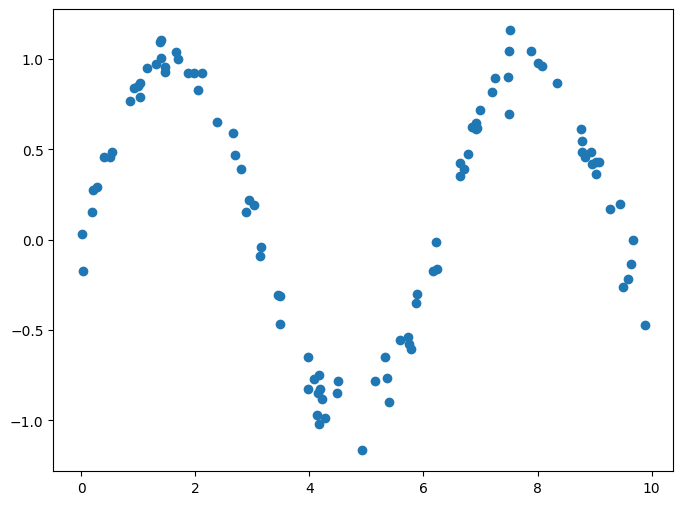

In [57]:
# Generar un dataset aleatorio
rng = np.random.RandomState(1) # Dataset aleatorio
num_samples = 100 # Número de muestras
x = 10 * rng.rand(num_samples) # Valores de x
x.sort() # Ordenamos x
y = np.sin(x) + 0.1 * rng.randn(num_samples) # Valores de y

plt.scatter(x, y) # Gráfico de dispersión

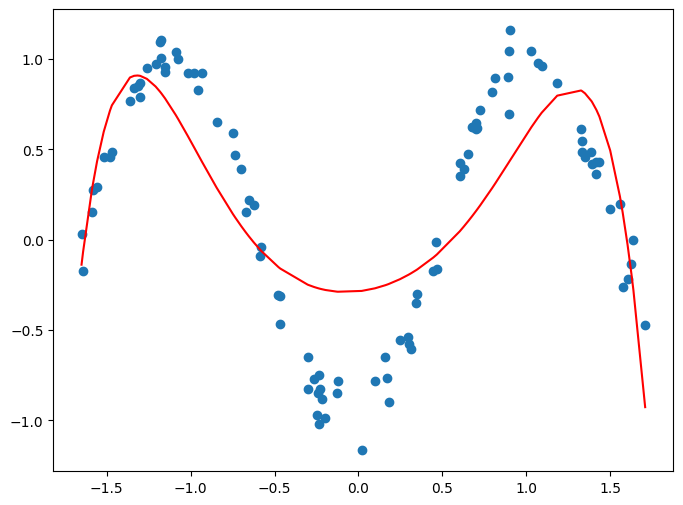

In [58]:
x_scaled = StandardScaler().fit_transform(x.reshape(-1, 1)) # Escalamos x

poly_model = make_pipeline( # Modelo de regresión polinómica
  PolynomialFeatures(6), # Características polinómicas
  SGDRegressor(random_state=0) # Regresor lineal
)
poly_model.fit(x_scaled, y) # Entrenamos el modelo
yfit = poly_model.predict(x_scaled) # Predicciones

plt.scatter(x_scaled, y) # Gráfico de dispersión
plt.plot(x_scaled, yfit, color='red') # Línea de regresión